In [18]:
import numpy as np
import cv2  as cv
import matplotlib.pyplot as plt

In [19]:
image = cv.imread('test_fixed.png')

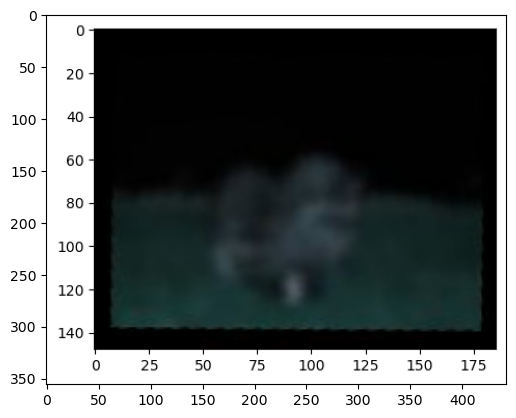

In [20]:
plt.imshow(image)

## Преобразование из brg в rgb

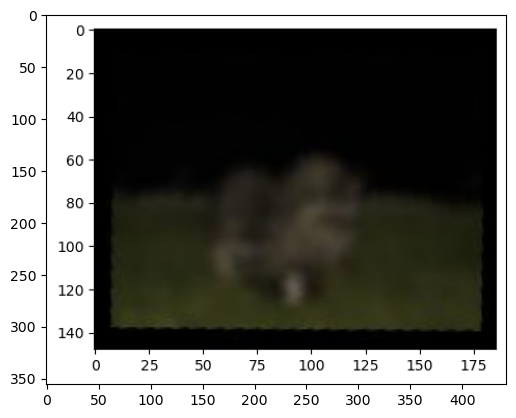

In [21]:
#Преобразуем изображение в rgb
rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(rgb_image)

## Применение матрицы сдвига в направление оси X

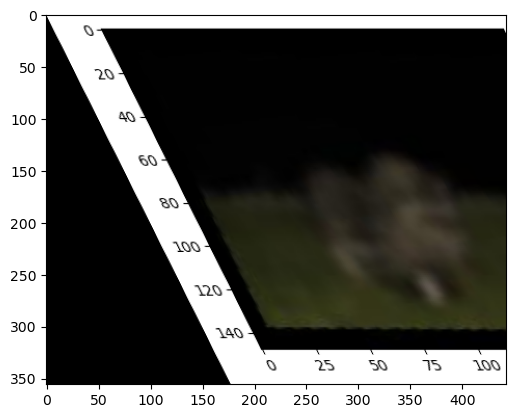

In [22]:
(h, w, d) = rgb_image.shape

M = np.float32([ [1, 0.5, 0],
               [0, 1, 0],
              [0, 0  , 1] ])
warped = cv.warpPerspective(rgb_image,M,(w,h))
plt.imshow(warped)

## Кадрирование изображение (избавление от черного фона)

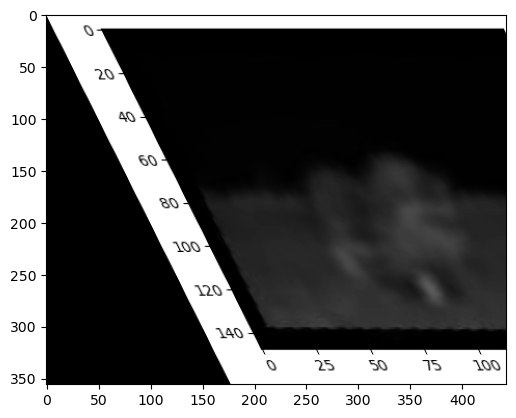

In [23]:
gray_image = cv.cvtColor(warped,cv.COLOR_RGB2GRAY)

plt.imshow(gray_image, cmap='gray', vmin = 0, vmax = 255)

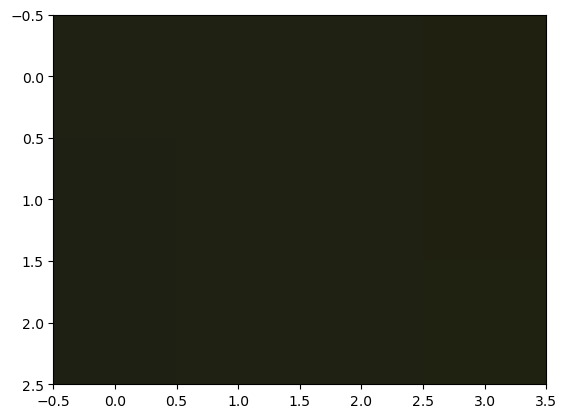

In [25]:
# Преобразование в двоичный формат
_,thresh = cv.threshold(gray_image,30,255,cv.THRESH_BINARY)

#Поиск конутра 
contours,hierarchy = cv.findContours(thresh,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
cnt = contours[0]

#Кадрирование
x,y,w,h= cv.boundingRect(cnt)
croped_image = warped[y:y+h,x:x+w]
cv.imwrite("test_fixed1.png", croped_image)

plt.imshow(croped_image)

In [26]:
histSize = [256]
range = [0, 256]


def plot_rgb_hist(image, histSize, range):
    histSize = [256]
    range = [0, 256]
    for i, col in enumerate(['b', 'g', 'r']):
        hist = cv.calcHist([image], [i], None, histSize, range)
        plt.plot(hist, color=col)
        plt.xlim(range)

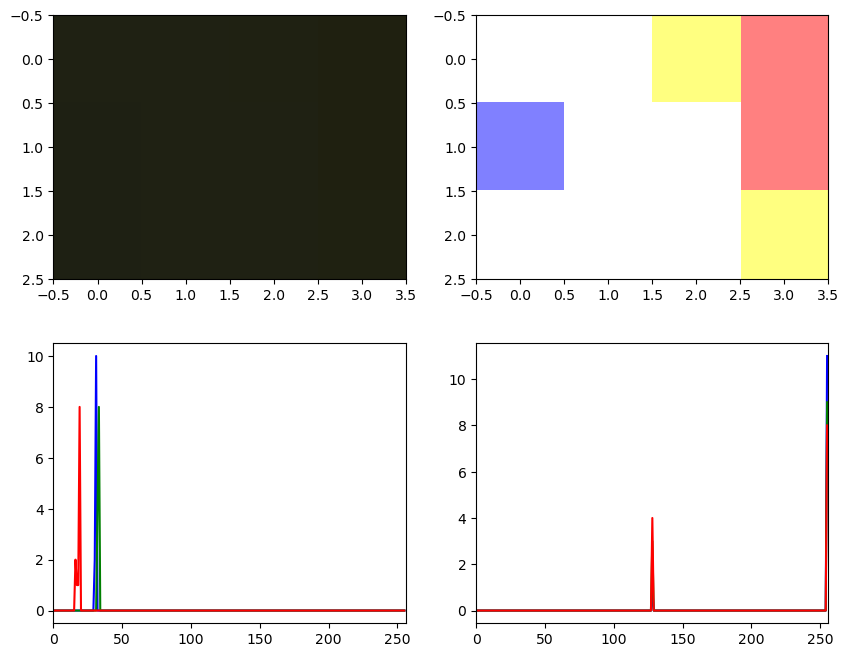

In [27]:
croped_image
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

rgb_result_image = np.empty(np.shape(croped_image), np.uint8)
rgb_result_image[:, :, 1] = clahe.apply(croped_image[:, :, 1])
rgb_result_image[:, :, 2] = clahe.apply(croped_image[:, :, 2])
rgb_result_image[:, :, 0] =clahe.apply(croped_image[:, :, 0])


gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(croped_image)
plt.subplot(gs[1])
plt.imshow(rgb_result_image)
plt.subplot(gs[2])
plot_rgb_hist(croped_image, histSize, range)
plt.subplot(gs[3])
plot_rgb_hist(rgb_result_image, histSize, range)

cv.imwrite("rgb_result_image.jpg", rgb_result_image)
plt.show()

# Улучшение изображения

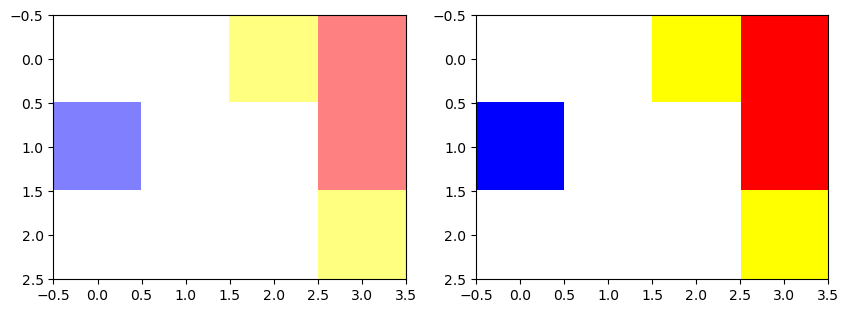

True

In [13]:
kernel1 = np.asarray([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
filtered_image = cv.filter2D(rgb_result_image, -1, kernel1)

gs = plt.GridSpec(1, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(rgb_result_image)
plt.subplot(gs[1])
plt.imshow(filtered_image)

plt.show()
cv.imwrite("result_image.jpg", filtered_image)
